In [1]:
import numpy as np
from connect_four import Game, GameType 

In [2]:
game_init = np.array(
    [
        [2, 2, 2, 1, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 2, 2, 2, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 1, 1, 2, 0, 2, 0],
        [2, 2, 1, 2, 0, 1, 0],
    ]
)

In [3]:
game = Game(game_state=game_init, game_type=GameType.MCTS_VS_RANDOM, mcts_maxiter=1000)

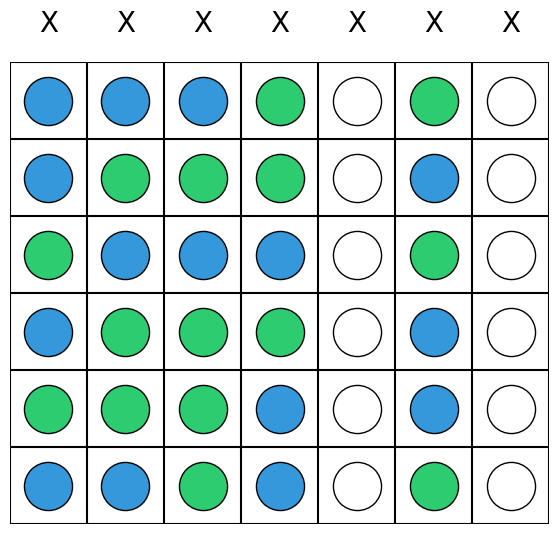

Running tree search to choose action ...
Qvalues: {np.int64(4): 0.39872068230277186, np.int64(6): 0.5480225988700564}
Choosing 6


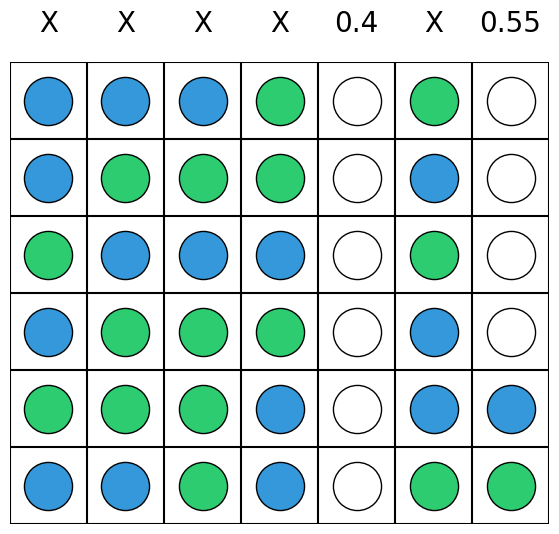

Running tree search to choose action ...
Qvalues: {np.int64(6): 0.7078260869565217, np.int64(4): 0.3458823529411765}
Choosing 6


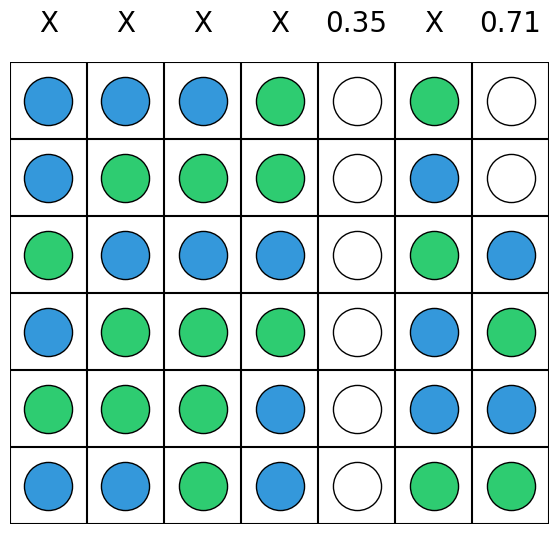

Running tree search to choose action ...
Qvalues: {np.int64(4): -1.0, np.int64(6): -1.0}
Choosing 4


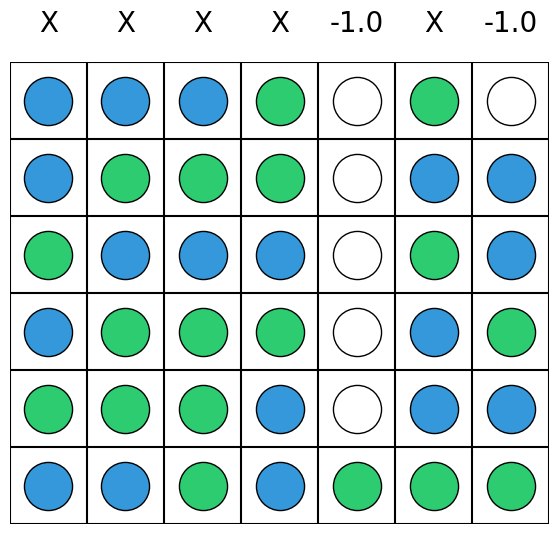

Running tree search to choose action ...
Qvalues: {np.int64(6): -1.0, np.int64(4): 1.0}
Choosing 4


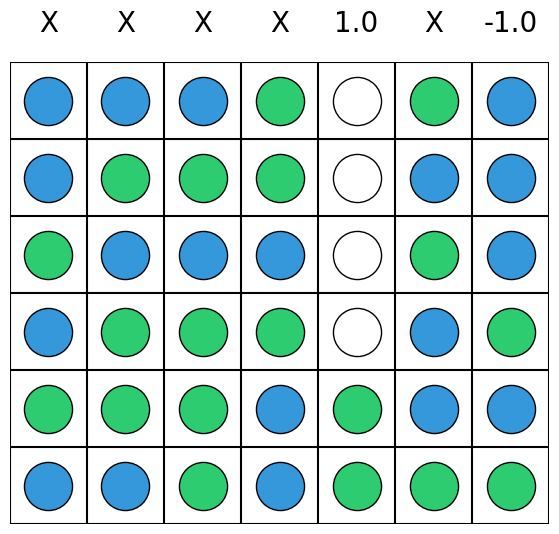

Running tree search to choose action ...
Qvalues: {np.int64(4): 1.0}
Choosing 4


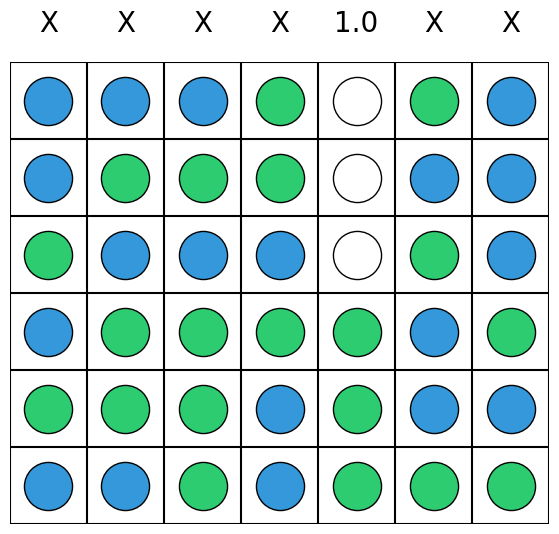

The winner of the game is: 1


In [4]:
game.play()